<a href="https://colab.research.google.com/github/victorjms/visualizacion_de_datos/blob/main/Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Victor Montenegro
## Ejercicio de visualización de datos

Makeover Monday ofrece un reto semanal de recrear o mejorar visualizaciones de datos. ¡Tu tarea es elegir uno de las visualizaciones de datos para recrear o mejorar!

Para hacer esto:

1. Elegir un conjunto de datos de la Data Sets list. Puedes elegir un conjunto de datos reciente o uno del año anterior, ¡siempre y cuando te interese!
2. Descarga los datos que elegiste.
3. Usa Python para crear una visualización informativa y placentera a la vista usando los datos que seleccionaste.

También necesitas subir tu trabajo para esta tarea a GitHub, ¡así todos pueden ver lo fabulosa que es la visualización que creaste!

Para hacer esto:

1. Crea un nuevo repositorio de GitHub con un nombre informativo para su visualización o datos. (Nota: aquí hay instrucciones de cómo hacerlo si no estás segur. Asegúrate de marcar la casilla «Inicie este repositorio con un README.»).
2. Agrega tu código al repositorio GitHub que creaste. Puedes hacerlo en Google Colab seleccionando Archivo > «Guardar una Copia en GitHub».
3. Edita el README para crear un resumen informativo de los ejercicios que explican el propósito de la tarea/visualización, los datos y qué muestra/dice la visualización que creaste. ¡También podrías querer incluir una imagen estática de tu visualización final en el README! (Nota: los README son archivos markdown. Aquí hay una hoja con soluciones de markdown syntax.) ¡Intenta hacerlo lo más informativo y profesional posible, ya que esto es lo primero que las personas verán cuando entren a tu repositorio GitHub!



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
filename = '/content/drive/My Drive/Coding Dojo/Semana 03/Tareas Core/europe_power.csv' # colocamos la ruta del archivo a importar
df = pd.read_csv(filename, sep=';') # colocamos el contenido del archivo en "df"
df # imprimimos "df"

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
0,2000,Austria,Fossil,16,27.0,NaN,NaN
1,2000,Austria,Coal,6,10.0,NaN,NaN
2,2000,Austria,Hard Coal,4,7.0,NaN,NaN
3,2000,Austria,Lignite,1,2.0,NaN,NaN
4,2000,Austria,Gas,8,13.0,NaN,NaN
...,...,...,...,...,...,...,...
10705,2020,United Kingdom,Bioenergy,35,12.0,4,2.0
10706,2020,United Kingdom,Other renewables,0,0.0,0,0.0
10707,2020,United Kingdom,Production,305,NaN,-4,-14.0
10708,2020,United Kingdom,Net imports,18,NaN,-14,-3.0


In [61]:
df_g = df.groupby(['Year', 'Variable'])[['Share of production (%)']].cumsum()

In [62]:
df_g.head(20)

,Share of production (%)
0,27.0
1,10.0
2,7.0
3,2.0
4,13.0
5,5.0
6,0.0
7,73.0
8,70.0
9,0.0


In [51]:
fossil = df.loc[:, 'Variable'] == 'Fossil'
df_fossil = df.loc[fossil]
df_fossil.tail()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
10625,2020,Slovakia,Fossil,5,19.0,-1,0.0
10642,2020,Slovenia,Fossil,5,29.0,-1,0.0
10659,2020,Spain,Fossil,91,34.0,-19,-22.0
10676,2020,Sweden,Fossil,4,2.0,0,0.0
10693,2020,United Kingdom,Fossil,124,41.0,-14,-21.0


In [122]:
# agrupo por año y por participación de mercado
fossil1 = df_fossil.groupby(['Year'])['Share of production (%)'].median()
fos = fossil1.astype(int)
fos

Year
2000    59
2001    61
2002    60
2003    63
2004    61
2005    60
2006    62
2007    62
2008    59
2009    55
2010    53
2011    57
2012    55
2013    48
2014    44
2015    50
2016    44
2017    44
2018    42
2019    41
2020    37
Name: Share of production (%), dtype: int64

In [134]:
# Coloco en la variable fossil_tiempo la lista correspondiente a los años.
fos_tiempo = list(fos.index)
fos_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [133]:
# Coloco los valores en la variable fossil_share
fos_share = list(fos.values)
fos_share

[59,
 61,
 60,
 63,
 61,
 60,
 62,
 62,
 59,
 55,
 53,
 57,
 55,
 48,
 44,
 50,
 44,
 44,
 42,
 41,
 37]

In [78]:
renewable = df.loc[:, 'Variable'] == 'Renewables'
df_renewable = df.loc[renewable]
df_renewable.head()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
7,2000,Austria,Renewables,43,73.0,NaN,NaN
24,2000,Belgium,Renewables,1,1.0,NaN,NaN
41,2000,Bulgaria,Renewables,3,6.0,NaN,NaN
58,2000,Croatia,Renewables,6,57.0,NaN,NaN
75,2000,Cyprus,Renewables,0,0.0,NaN,NaN


In [119]:
# agrupo por año y por participación de mercado
renewable1 = df_renewable.groupby(['Year'])['Share of production (%)'].median()
ren = renewable1.astype(int)
ren

Year
2000    13
2001    14
2002    10
2003    10
2004    10
2005    10
2006    12
2007    13
2008    14
2009    15
2010    18
2011    20
2012    21
2013    24
2014    25
2015    29
2016    29
2017    29
2018    32
2019    35
2020    40
Name: Share of production (%), dtype: int64

In [132]:
# Coloco en la variable renewable_tiempo la lista correspondiente a los años.
ren_tiempo = list(ren.index)
ren_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [131]:
# Coloco los valores en la variable renewable_share
ren_share = list(ren.values)
ren_share

[13,
 14,
 10,
 10,
 10,
 10,
 12,
 13,
 14,
 15,
 18,
 20,
 21,
 24,
 25,
 29,
 29,
 29,
 32,
 35,
 40]

In [56]:
nuclear = df.loc[:, 'Variable'] == 'Nuclear'
df_nuclear = df.loc[nuclear]
df_nuclear.tail()

,Year,Area,Variable,Generation (TWh),Share of production (%),Change on last year (%),Change on last year (TWh)
10631,2020,Slovakia,Nuclear,15,54.0,0,0.0
10648,2020,Slovenia,Nuclear,6,37.0,9,1.0
10665,2020,Spain,Nuclear,58,22.0,0,0.0
10682,2020,Sweden,Nuclear,50,30.0,-25,-17.0
10699,2020,United Kingdom,Nuclear,52,17.0,-9,-5.0


In [116]:
# agrupo por año y por participación de mercado
nuclear1 = df_nuclear.groupby(['Year'])['Share of production (%)'].median()
nuc = nuclear1.astype(int)
nuc

Year
2000    15
2001    15
2002    16
2003    15
2004    15
2005    14
2006    14
2007    14
2008    15
2009    18
2010     9
2011    11
2012    10
2013     9
2014    10
2015     9
2016     8
2017     7
2018     7
2019     7
2020     7
Name: Share of production (%), dtype: int64

In [130]:
# Coloco en la variable nuclear_tiempo la lista correspondiente a los años.
nuc_tiempo = list(nuc.index)
nuc_tiempo

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [136]:
# Coloco los valores en la variable nuclear_share
nuc_share = list(nuc.values)
nuc_share

[15, 15, 16, 15, 15, 14, 14, 14, 15, 18, 9, 11, 10, 9, 10, 9, 8, 7, 7, 7, 7]

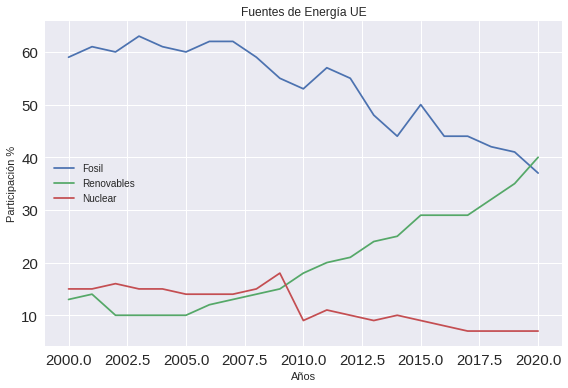

In [152]:
# Gráfico
import seaborn as sns
plt.style.use('seaborn')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([1999, 2021])
plt.xlabel('Años')
plt.ylabel('Participación %')
plt.title('Fuentes de Energía UE')
plt.grid(True)
plt.plot(fos_tiempo, fos_share, label='Fosil')
plt.plot(ren_tiempo, ren_share, label='Renovables')
plt.plot(nuc_tiempo, nuc_share, label='Nuclear')
plt.legend(loc='center left')
plt.savefig('energia_ue.png', dpi = 300)

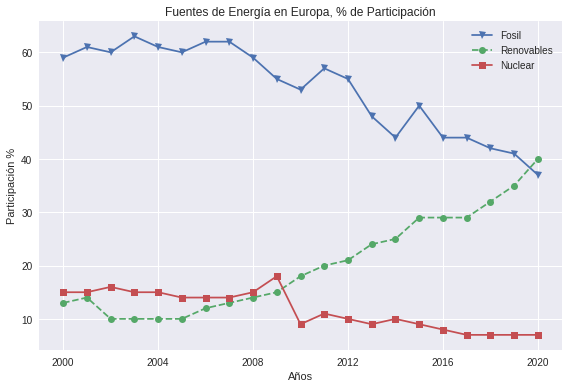

In [171]:
# Se cre la figura y los ejes con plt.subplots
fig, ax = plt.subplots()
# Grafico de fuentes fósiles
ax.plot(fos_tiempo, fos_share, marker="v", label='Fosil')

# Gráfico de fuentes renovables
ax.plot(ren_tiempo , ren_share, "--", marker="o", label='Renovables')

# Gráfico de energía nuclear
ax.plot(nuc_tiempo , nuc_share, marker="s", label='Nuclear')

# me tomó mucho tiempo encontrar la manera de manipular los labels del eje "x"
ticks = ax.set_xticks([2000, 2004, 2008, 2012, 2016, 2020])
labels = ax.set_xticklabels(['2000', '2004', '2008', '2012', '2016', '2020'])

# Ubicación de la leyenda
ax.legend(loc='best')

# establece el título
ax.set_title("Fuentes de Energía en Europa, % de Participación")

# establece el nombre en los ejes x e y
ax.set_xlabel("Años")
ax.set_ylabel("Participación %")

# Graficamos la imagen final
plt.show()

# Guardamos la imagen en un archivo .png
fig.savefig('energia_ue1.png', dpi=300)